In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from google.colab import drive
import os
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd

def load_model_and_params(load_dir):
    """
    Loads the trained model, tokenizer, model parameters, and data paths.

    Args:
        load_dir (str): The directory path in Google Drive to load the files from.

    Returns:
        tuple: A tuple containing loaded_model, loaded_tokenizer, loaded_params, loaded_data_paths.
               Returns None for any component that fails to load.
    """
    loaded_model = None
    loaded_tokenizer = None
    loaded_params = None
    loaded_data_paths = None

    # Load the trained model
    model_load_path = os.path.join(load_dir, 'lstm_recommendation_model.keras')
    try:
        loaded_model = tf.keras.models.load_model(model_load_path)
        print(f"Model loaded successfully from {model_load_path}")
    except Exception as e:
        print(f"Error loading model from {model_load_path}: {e}")


    # Load the tokenizer
    tokenizer_load_path = os.path.join(load_dir, 'tokenizer.pkl')
    try:
        with open(tokenizer_load_path, 'rb') as handle:
            loaded_tokenizer = pickle.load(handle)
        print(f"Tokenizer loaded successfully from {tokenizer_load_path}")
    except Exception as e:
        print(f"Error loading tokenizer from {tokenizer_load_path}: {e}")

    # Load the model parameters
    params_load_path = os.path.join(load_dir, 'model_params.pkl')
    try:
        with open(params_load_path, 'rb') as handle:
            loaded_params = pickle.load(handle)
        print(f"Model parameters loaded successfully from {params_load_path}")
        if loaded_params:
            print(f"max_sequence_length: {loaded_params.get('max_sequence_length')}")
            print(f"vocab_size: {loaded_params.get('vocab_size')}")
    except Exception as e:
        print(f"Error loading model parameters from {params_load_path}: {e}")


    # Load the data paths (optional, only if you need to reload data)
    data_paths_load_path = os.path.join(load_dir, 'data_paths.pkl')
    try:
        with open(data_paths_load_path, 'rb') as handle:
            loaded_data_paths = pickle.load(handle)
        print(f"Data paths loaded successfully from {data_paths_load_path}")
        # Example of loading data using the paths
        # if loaded_data_paths and os.path.exists(loaded_data_paths['df_encoded_path']):
        #     loaded_df_encoded = pd.read_pickle(loaded_data_paths['df_encoded_path'])
        #     print(f"df_encoded loaded from {loaded_data_paths['df_encoded_path']}")
    except Exception as e:
        print(f"Error loading data paths from {data_paths_load_path}: {e}")

    if loaded_model and loaded_tokenizer and loaded_params:
        print("\nAll necessary components loaded.")
        return loaded_model, loaded_tokenizer, loaded_params, loaded_data_paths
    else:
        print("\nFailed to load one or more components.")
        return None, None, None, None



In [8]:


# Example usage in another notebook:
load_dir = '/content/drive/MyDrive/restaurant_recommendation_model/'
loaded_model, loaded_tokenizer, loaded_params, loaded_data_paths = load_model_and_params(load_dir)

if loaded_model:
    # Now you can use the loaded components
    print("Model loaded successfully.")
    # Access parameters like:
    max_sequence_length = loaded_params.get('max_sequence_length')
    vocab_size = loaded_params.get('vocab_size')
    # Use loaded_model for predictions or analysis
else:
    print("Failed to load model and parameters.")

Model loaded successfully from /content/drive/MyDrive/restaurant_recommendation_model/lstm_recommendation_model.keras
Tokenizer loaded successfully from /content/drive/MyDrive/restaurant_recommendation_model/tokenizer.pkl
Model parameters loaded successfully from /content/drive/MyDrive/restaurant_recommendation_model/model_params.pkl
max_sequence_length: 100
vocab_size: 11369
Data paths loaded successfully from /content/drive/MyDrive/restaurant_recommendation_model/data_paths.pkl

All necessary components loaded.
Model loaded successfully.


In [9]:
# Load the data using the loaded_data_paths
try:
    loaded_df_encoded = pd.read_pickle(loaded_data_paths['df_encoded_path'])
    loaded_padded_sequences = np.load(loaded_data_paths['padded_sequences_path'])
    loaded_other_features = np.load(loaded_data_paths['other_features_path'])
    loaded_target = np.load(loaded_data_paths['target_path'])

    print("Data loaded successfully:")
    print(f"- Encoded DataFrame shape: {loaded_df_encoded.shape}")
    print(f"- Padded sequences shape: {loaded_padded_sequences.shape}")
    print(f"- Other features shape: {loaded_other_features.shape}")
    print(f"- Target shape: {loaded_target.shape}")

except Exception as e:
    print(f"Error loading data: {e}")
    loaded_df_encoded = None
    loaded_padded_sequences = None
    loaded_other_features = None
    loaded_target = None

Data loaded successfully:
- Encoded DataFrame shape: (775, 352)
- Padded sequences shape: (775, 100)
- Other features shape: (775, 347)
- Target shape: (775,)


In [10]:
# Prepare data for prediction
# Assuming your model expects two inputs: the padded sequences and the other features
# You might need to adjust this based on how your model was trained
if loaded_padded_sequences is not None and loaded_other_features is not None:
    model_inputs = [loaded_padded_sequences, loaded_other_features]
    print("Data prepared for prediction.")
else:
    model_inputs = None
    print("Could not prepare data for prediction due to missing data.")

# Generate predictions
if loaded_model is not None and model_inputs is not None:
    try:
        predictions = loaded_model.predict(model_inputs)
        print("\nPredictions generated successfully.")
        print(f"Predictions shape: {predictions.shape}")
    except Exception as e:
        print(f"Error generating predictions: {e}")
        predictions = None
else:
    predictions = None
    print("\nCould not generate predictions. Model or data is missing.")

Data prepared for prediction.
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step

Predictions generated successfully.
Predictions shape: (775, 1)


In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

if predictions is not None and loaded_target is not None:
    try:
        # Calculate Mean Squared Error
        mse = mean_squared_error(loaded_target, predictions)
        print(f"\nMean Squared Error (MSE): {mse}")

        # Calculate Root Mean Squared Error
        rmse = sqrt(mse)
        print(f"Root Mean Squared Error (RMSE): {rmse}")

    except Exception as e:
        print(f"Error calculating evaluation metrics: {e}")
else:
    print("\nCould not calculate evaluation metrics. Predictions or target data is missing.")


Mean Squared Error (MSE): 0.13236990545847896
Root Mean Squared Error (RMSE): 0.36382675198297193


Created feature layer model successfully using the second to last layer.
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

Feature vectors extracted successfully.
Feature vectors shape: (775, 64)

Calculating pairwise cosine similarity...
Cosine similarity matrix calculated successfully.
Cosine similarity matrix shape: (775, 775)

Analyzing the distribution of similarity scores:
Number of similarity scores: 299925
Mean similarity score: 0.9227882027626038
Median similarity score: 0.9719944596290588
Standard deviation of similarity scores: 0.10860420018434525


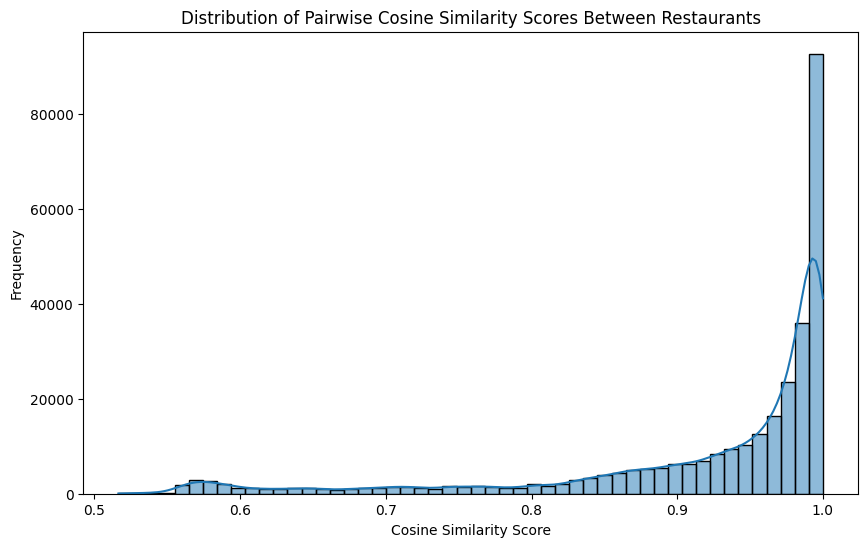

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model

# Ensure df_encoded and padded_sequences are aligned for feature extraction
# Resetting index to ensure alignment
df_encoded_aligned = loaded_df_encoded.copy().reset_index(drop=True)
# Assuming loaded_padded_sequences is already aligned with loaded_df_encoded
padded_sequences_aligned = loaded_padded_sequences

# Get the combined feature layer output from the loaded model
# Assuming the concatenation layer for features is named 'concatenate_5'
if loaded_model is not None and isinstance(loaded_model, tf.keras.Model):
    try:
        # Find the layer before the output layer (assuming it's the combined feature layer)
        # This might need adjustment based on your specific model architecture
        # A common pattern is to have a dense layer after concatenation and before output
        # Let's try to get the layer before the last one, assuming the last is the output prediction layer
        if len(loaded_model.layers) > 1:
             # Get the layer just before the output layer
             feature_layer_output_tensor = loaded_model.layers[-2].output
             feature_layer_model = Model(inputs=loaded_model.input, outputs=feature_layer_output_tensor)
             print("Created feature layer model successfully using the second to last layer.")
        else:
             print("Model has only one layer. Cannot extract a feature layer.")
             feature_layer_model = None

    except Exception as e:
        print(f"Error creating feature layer model: {e}")
        print("Please ensure the loaded model has multiple layers and try specifying a different layer name/index if needed.")
        feature_layer_model = None
else:
    print("Loaded model is not available or not a Keras Model.")
    feature_layer_model = None


if feature_layer_model:
    # Prepare the input data for the feature layer model
    # The input to the feature_layer_model should be the same as the input to the original model
    if loaded_padded_sequences is not None and loaded_other_features is not None:
        model_inputs = [loaded_padded_sequences, loaded_other_features]

        # Get feature vectors
        try:
            feature_vectors = feature_layer_model.predict(model_inputs)
            print("\nFeature vectors extracted successfully.")
            print(f"Feature vectors shape: {feature_vectors.shape}")

            # Calculate pairwise cosine similarity
            print("\nCalculating pairwise cosine similarity...")
            cosine_sim_matrix = cosine_similarity(feature_vectors)
            print("Cosine similarity matrix calculated successfully.")
            print(f"Cosine similarity matrix shape: {cosine_sim_matrix.shape}")

            # Analyze the distribution of similarity scores
            # Exclude the diagonal (similarity of a restaurant with itself, which is 1)
            # and take the upper triangle to avoid duplicate pairs
            upper_triangle = np.triu(cosine_sim_matrix, k=1)
            similarity_scores = upper_triangle.flatten()
            similarity_scores = similarity_scores[similarity_scores != 0] # Remove zeros from the lower triangle

            print("\nAnalyzing the distribution of similarity scores:")
            print(f"Number of similarity scores: {len(similarity_scores)}")
            print(f"Mean similarity score: {np.mean(similarity_scores)}")
            print(f"Median similarity score: {np.median(similarity_scores)}")
            print(f"Standard deviation of similarity scores: {np.std(similarity_scores)}")

            # Visualize the distribution
            plt.figure(figsize=(10, 6))
            sns.histplot(similarity_scores, bins=50, kde=True)
            plt.title('Distribution of Pairwise Cosine Similarity Scores Between Restaurants')
            plt.xlabel('Cosine Similarity Score')
            plt.ylabel('Frequency')
            plt.show()

        except Exception as e:
            print(f"Error during feature extraction or similarity calculation: {e}")
    else:
        print("Could not prepare data for feature extraction due to missing data.")
else:
    print("Could not perform similarity analysis as the feature layer model was not created.")

In [13]:
def find_similar_restaurants(restaurant_name, df_encoded_aligned, feature_vectors, cosine_sim_matrix, n_top=5):
    """
    Finds the top N similar restaurants based on cosine similarity of feature vectors.

    Args:
        restaurant_name (str): The name of the restaurant to find similar ones for.
        df_encoded_aligned (pd.DataFrame): The DataFrame containing restaurant information, aligned with feature_vectors.
        feature_vectors (np.ndarray): The array of feature vectors for each restaurant.
        cosine_sim_matrix (np.ndarray): The pairwise cosine similarity matrix.
        n_top (int): The number of top similar restaurants to return.

    Returns:
        pd.DataFrame: A DataFrame containing the top N similar restaurants and their similarity scores.
                      Returns an empty DataFrame if the restaurant is not found.
    """
    if restaurant_name not in df_encoded_aligned['name'].values:
        print(f"Restaurant '{restaurant_name}' not found in the dataset.")
        return pd.DataFrame()

    # Get the index of the restaurant
    restaurant_index = df_encoded_aligned[df_encoded_aligned['name'] == restaurant_name].index[0]

    # Get the similarity scores for this restaurant with all other restaurants
    similarity_scores = list(enumerate(cosine_sim_matrix[restaurant_index]))

    # Sort the restaurants based on the similarity scores
    sorted_similar_restaurants = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top N similar restaurants (excluding the restaurant itself)
    top_similar_restaurants_indices = [i[0] for i in sorted_similar_restaurants[1:n_top+1]]
    top_similar_restaurants_scores = [i[1] for i in sorted_similar_restaurants[1:n_top+1]]

    # Get the names and relevant information of the top similar restaurants
    # Select only the columns that exist in df_encoded_aligned
    available_columns = ['name', 'rate', 'votes'] # Add other relevant original columns if they exist and are useful for qualitative assessment
    similar_restaurants_info = df_encoded_aligned.iloc[top_similar_restaurants_indices][available_columns]
    similar_restaurants_info['similarity_score'] = top_similar_restaurants_scores

    return similar_restaurants_info

# Example qualitative assessment: Check similar restaurants for a few examples

# Example 1
example_restaurant_name_1 = 'Jalsa'
print(f"Similar restaurants for '{example_restaurant_name_1}':")
# Use the loaded variables
if example_restaurant_name_1 in df_encoded_aligned['name'].values:
    similar_restaurants_1 = find_similar_restaurants(example_restaurant_name_1, df_encoded_aligned, feature_vectors, cosine_sim_matrix, n_top=5)
    display(similar_restaurants_1)
else:
     print(f"Restaurant '{example_restaurant_name_1}' not found in the dataset.")

print("-" * 50) # Separator

# Example 2 (Replace with another restaurant name from your dataset)
example_restaurant_name_2 = 'San Churro Cafe'
print(f"Similar restaurants for '{example_restaurant_name_2}':")
# Use the loaded variables
if example_restaurant_name_2 in df_encoded_aligned['name'].values:
    similar_restaurants_2 = find_similar_restaurants(example_restaurant_name_2, df_encoded_aligned, feature_vectors, cosine_sim_matrix, n_top=5)
    display(similar_restaurants_2)
else:
     print(f"Restaurant '{example_restaurant_name_2}' not found in the dataset.")

print("-" * 50) # Separator

# Example 3 (Replace with another restaurant name from your dataset)
example_restaurant_name_3 = 'Addhuri Udupi Bhojana'
print(f"Similar restaurants for '{example_restaurant_name_3}':")
# Use the loaded variables
if example_restaurant_name_3 in df_encoded_aligned['name'].values:
    similar_restaurants_3 = find_similar_restaurants(example_restaurant_name_3, df_encoded_aligned, feature_vectors, cosine_sim_matrix, n_top=5)
    display(similar_restaurants_3)
else:
     print(f"Restaurant '{example_restaurant_name_3}' not found in the dataset.")

Similar restaurants for 'Jalsa':


,name,rate,votes,similarity_score
401,Jalsa,4.1,775,0.999999
486,Jalsa,4.1,775,0.999999
359,Jalpaan,4.0,866,0.999990
256,Spice Elephant,4.1,787,0.999973
499,1947,4.0,808,0.999973


--------------------------------------------------
Similar restaurants for 'San Churro Cafe':


,name,rate,votes,similarity_score
415,San Churro Cafe,3.8,918,0.999999
14,San Churro Cafe,3.8,918,0.999999
442,San Churro Cafe,3.8,918,0.999999
503,San Churro Cafe,3.8,918,0.999999
427,The Krishna Grand,3.9,888,0.999933


--------------------------------------------------
Similar restaurants for 'Addhuri Udupi Bhojana':


,name,rate,votes,similarity_score
574,Addhuri Udupi Bhojana,3.7,88,0.999986
591,New Sagar Fast Food,3.6,71,0.999862
274,Dakshin Grand,3.0,82,0.999824
597,Dakshin Grand,3.0,82,0.999820
18,T3H Cafe,3.9,93,0.999813


In [15]:
pip freeze > requirements4.txt